In [1]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [2]:
# Gravitational wave spectrum diagram
import matplotlib.pyplot as plt
#plt.style.use("../thesis-style.mpl")

import astropy.units as u
import numpy as np

import thesis

import gravpy.interferometers as ifo
import gravpy.timingarray as arrays

In [3]:
parameters = {
    "acoustic": {
        "color": "red",
        "range": [1e1, 1e4]
    },
    "space": {
        "color":"blue",
        "range": [1e-5, 1e1]
    },
    "cosmological": {
        "color":"green",
        "range": [1e-5, 1e-12]
    }
}

In [4]:
ipta = arrays.IPTA()

In [6]:
import matplotlib

In [ ]:
ip

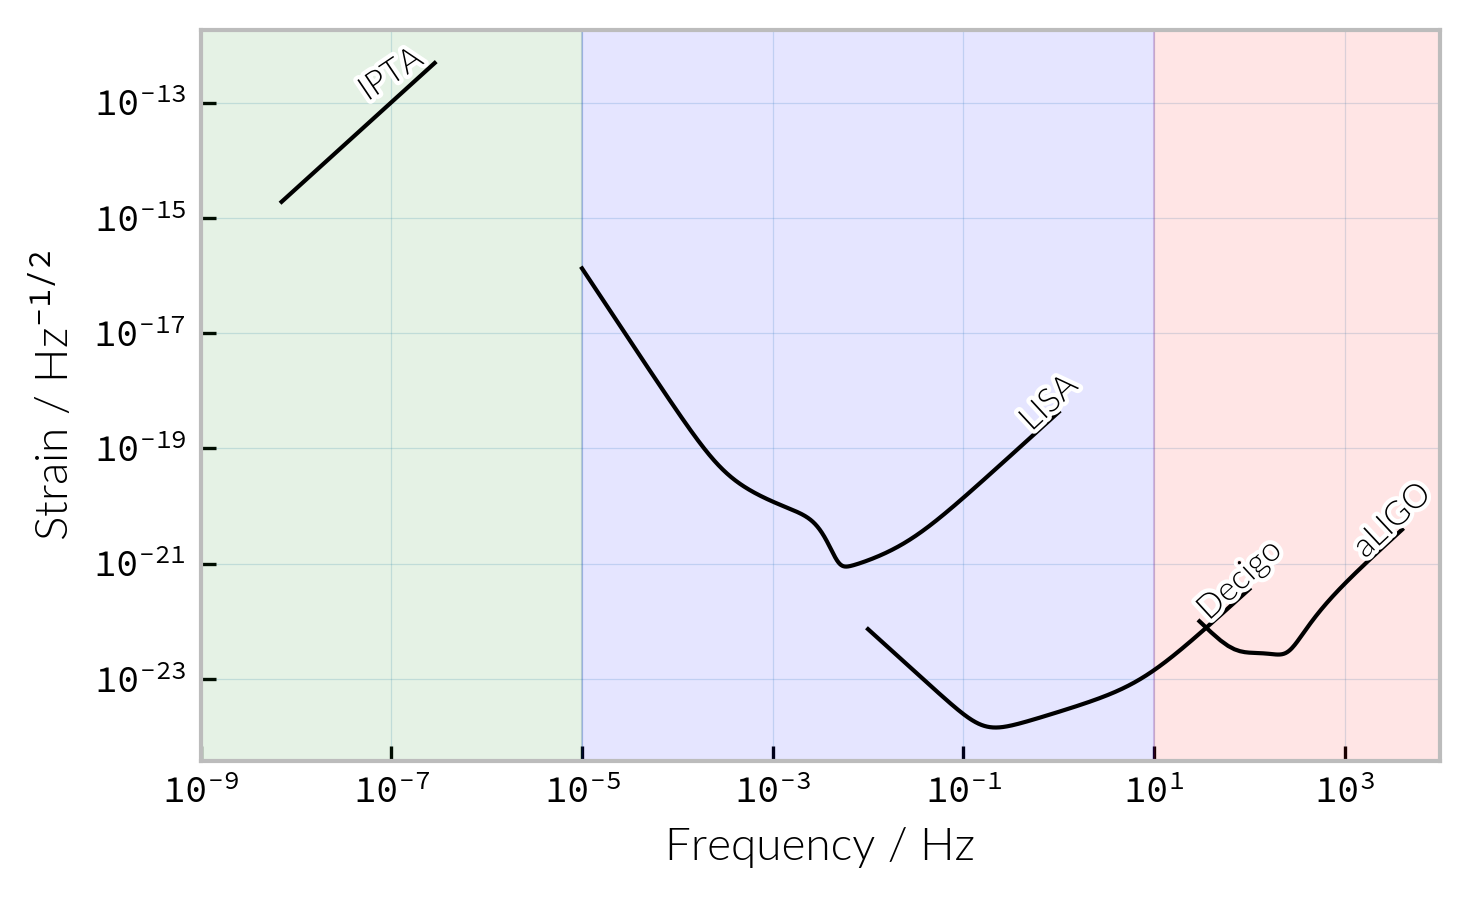

In [20]:
figsize = (6.0, 6.0/1.618) 
f, ax = plt.subplots(1,1, figsize=figsize, dpi=300)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e-9, 1e4])

aligo = ifo.AdvancedLIGO()
aligo.frequencies = np.linspace(30,4000, 400) * u.hertz
elisa = ifo.EvolvedLISA()
decigo = ifo.Decigo()
lisa = ifo.LISA()

aligo.plot(ax, color="k", lw=1)
lisa.plot(ax, color="k", lw=1)

decigo.plot(ax, color="k", lw=1)

ipta_line = ipta.plot(ax, color='k', lw=1)

for band in parameters.items():
    ymax = ax.get_ylim()[1]
    ax.axvspan(band[1]["range"][0], band[1]["range"][1], alpha=0.1, color=band[1]["color"])

import gravpy.sources as sources


thesis.labelLines(f.gca().get_lines(), fontsize=8)

thesis.labelLine(ipta_line[0], label="IPTA", x=1e-7, fontsize=8, yshift=3)

f = thesis.thesisify(f) 

f.savefig("{}/intro/gw-spectrum.{}".format(fig_dir, fig_ext), dpi=300)